# Task-3

To Explore Unsupervised Machine Learning

From this iris-data we predict the optimum number of clusters and will be exploring visually

In [1]:
#Import neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the iris dataset as an example 
from sklearn.datasets import load_iris 
iris = load_iris() 

In [3]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris_df.shape

(150, 4)

In [5]:
# store the feature matrix (X) and response vector (y) 
X = iris.data 
y = iris.target

In [6]:
# store the feature and target names 
feature_names = iris.feature_names 
target_names = iris.target_names 

In [7]:
# printing features and target names of our dataset 
print("Feature names:", feature_names) 
print('')
print("Target names:", target_names) 

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target names: ['setosa' 'versicolor' 'virginica']


In [8]:
# printing first 5 input rows 
print("\nFirst 5 rows of X:\n\n", X[:5])


First 5 rows of X:

 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# DETERMINING THE OPTIMAL NUMBER OF CLUSTERS

Among various different methods of find optimal number of clusters, ELBOW method which is very popular technique. 

     Explanation: The concept is to run k-means clustering for a range of clusters K and for each value, we     
     calculate the sum of squared distances from each point to its distortions(assigned center).
        
     we have to select the value of k at the “elbow” that the point after which the distortion start decreasing.
    

#Running K-Means with a range 
from sklearn.cluster import KMeans

distortions = []
K = range(1,10)
for i in K:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

In [10]:
#Plotting the distortions of K-Means
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

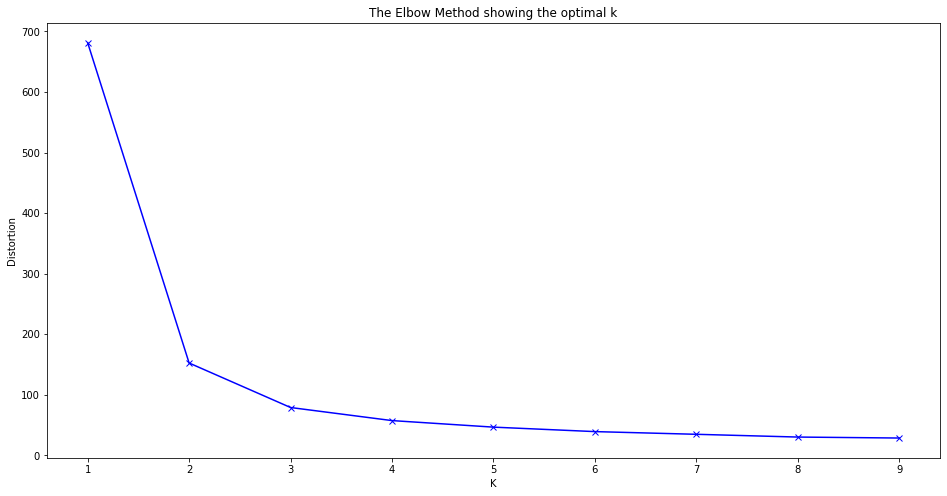

We can see that the “elbow” is the number 3 which is optimal for this case that means n_clusters=3.

In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [13]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [14]:
#make predictions
y_kmeans = kmeans.predict(X)

K-Means vs Actual for n_clusters=3


 ***********************Sepal Length vs Sepal Width ***********************


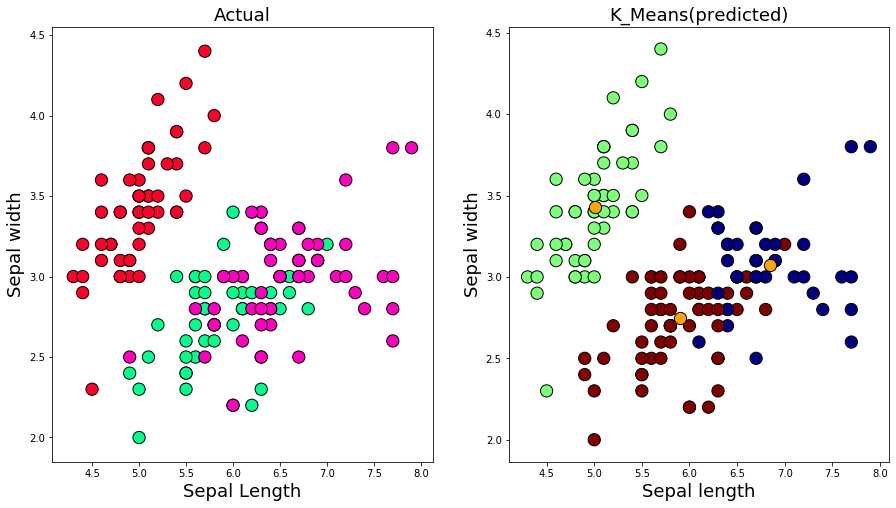

In [15]:
#Visualising the clusters between sepal Length and Sepal Width

plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow',edgecolor='k', s=150)
plt.gcf().set_size_inches(15, 8)
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal width', fontsize=18)
plt.title('Actual',fontsize=18)
 
plt.subplot(1, 2, 2)
plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='jet',edgecolor='k', s=150)
plt.gcf().set_size_inches(15, 8)
plt.xlabel('Sepal length', fontsize=18)
plt.ylabel('Sepal width', fontsize=18)
plt.title("K_Means(predicted)",fontsize=18)


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            edgecolor='k',s = 150, c = 'red', label = 'Centroids')



print('\n ***********************Sepal Length vs Sepal Width ***********************')




 ***********************Petal Length vs Petal Width ***********************


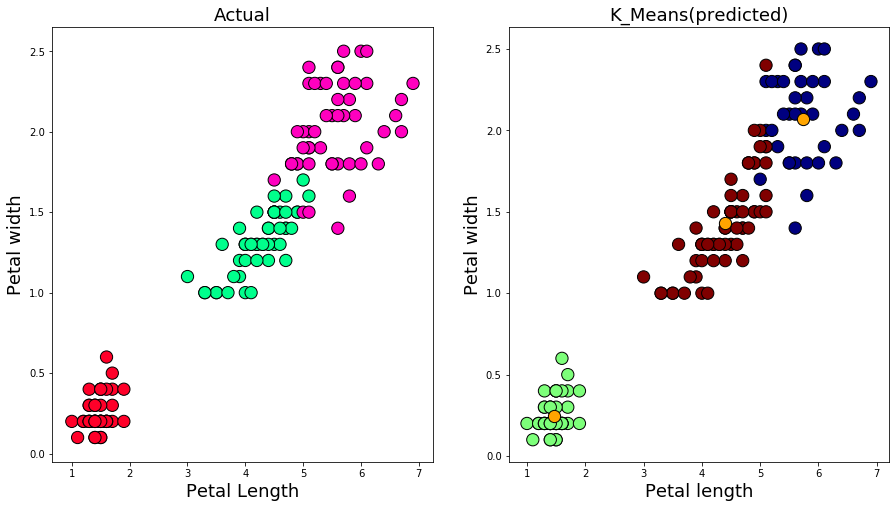

In [16]:

# Visualising the clusters between Petal Length and Petal Width
plt.subplot(1, 2, 1)
plt.scatter(X[:,2], X[:,3], c=y, cmap='gist_rainbow',edgecolor='k', s=150)
plt.gcf().set_size_inches(15, 8)
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal width', fontsize=18)
plt.title('Actual',fontsize=18)
 
plt.subplot(1, 2, 2)
plt.scatter(X[:,2], X[:,3], c=y_kmeans, cmap='jet',edgecolor='k', s=150)
plt.gcf().set_size_inches(15, 8)
plt.xlabel('Petal length', fontsize=18)
plt.ylabel('Petal width', fontsize=18)
plt.title("K_Means(predicted)",fontsize=18)

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            edgecolor='k',s = 150, c = 'orange', label = 'Centroids')



print('\n ***********************Petal Length vs Petal Width ***********************')


In [17]:
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 
  
# training the model on training set 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train) 
  
# making predictions on the testing set 
y_pred = knn.predict(X_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("kNN model accuracy:", metrics.accuracy_score(y_test, y_pred)) 
  

kNN model accuracy: 1.0
